In [49]:
import sys
sys.path.append("..")
import numpy as np

In [50]:
!pip show econometron

Name: econometron
Version: 0.1.0
Summary: A Python package for solving ,simulating and estimating DSGE and VAR models.
Home-page: https://econometron.netlify.app
Author: Mohamed Amine Ouerfelli 
Author-email: mohamedamine.ouerfelli@outlook.com
License: MIT
Location: c:\python310\lib\site-packages
Editable project location: C:\Users\ASUS\econometron
Requires: colorama, matplotlib, numpy, pandas, scipy, statsmodels, sympy
Required-by: 


In [51]:
import econometron

In [52]:
#in your case from econometron.Models import m

from econometron.Models import RE_model

## 🧠 New Keynesian Model — A Walkthrough

In this example, we work with a **linear New Keynesian model** to illustrate the core dynamics of output, inflation, and monetary policy.

---

### 📌 Model Structure

The model includes four main equations:

1. **Euler Equation** — models household intertemporal choices:

   $$
   x_t = x_{t+1} + \frac{1}{g}(r_t - \pi_{t+1}) = 0
   $$

   where $x_t$ is the output gap, $r_t$ is the nominal interest rate, and $\pi_{t+1}$ is expected inflation.

2. **New Keynesian Phillips Curve** — models inflation dynamics under sticky prices:

   $$
   \pi_t = \beta \pi_{t+1} - \kappa (x_t - \bar{x}_t) 
   $$

   where $\bar{x}_t$ is **potential output** and $x_t - \bar{x}_t$ represents the output gap relative to potential.

3. **Monetary Policy Rule (Taylor Rule)** — describes how the central bank adjusts the interest rate in response to inflation:

   $$
   r_t = \phi \pi_t 
   $$

4. **Potential Output Dynamics** — captures the stochastic evolution of potential output:

   $$
   \bar{x}_{t+1} = \rho \bar{x}_t + \sigma_x
   $$

---

### 📊 Variables

* $x_t$: Output
* $\pi_t$: Inflation
* $r_t$: Nominal interest rate
* $\bar{x}_t$: **Potential output**

---

### ⚙️ Parameters

* $g = 5$: Inverse of relative risk aversion
* $\beta = 0.99$: Discount factor
* $\kappa = 0.88$: Slope of Phillips curve
* $\rho = 0.95$: Persistence of potential output
* $\phi = 1.5$: Taylor rule coefficient
* $\sigma_x = 0.01$: Shock to potential output


In [53]:
# Model setup
equations = [
    "x_t - x_tp1 + (1/g) * (r_t - p_tp1) = 0",
    "p_t - beta * p_tp1 - kappa * (x_t - xbar_t) = 0",
    "- r_t + phi*p_t=0",
    "- xbar_tp1 + rho * xbar_t + sigmax = 0"
]

variables = ['x', 'p', 'r','xbar']
states = ['xbar']
exo_states=['xbar']
shock_names = ['sigmax']
# Parameters dictionary
parameters = {
    'g': 5,      # Inverse of relative risk aversion (1/g)
    'beta': 0.99,       # Discount factor
    'kappa': 0,
    'rho': 0.95,        # Persistence of output gap target
    'phi': 1.5,         # Taylor rule inflation coefficient
    'd': 0.5,          # Calvo parameter
    'sigmax':0.01
}

In [54]:
# Analytical steady state for initial guess
sigma_X, beta,g, rho, phi, d = parameters['sigmax'],parameters['beta'],parameters['g'],parameters['rho'],parameters['phi'],parameters['d']
parameters['kappa'] = ((1 - d) * (1 - d * beta)) / d
initial_guess = [1, 1, 1]

In [55]:
# Initialize and run model
NK = RE_model(
    equations=equations,
    variables=variables,
    exo_states=exo_states,
    shocks=shock_names,
    parameters=parameters,

)

In [56]:
NK.set_initial_guess(initial_guess)

In [57]:
NK.compute_ss(guess=initial_guess, method='fsolve', options={'xtol': 1e-10})

Steady-state residuals: [-0.   -0.   -0.   -0.01]


x        0.000000e+00
p       1.482197e-323
r       1.976263e-323
xbar     0.000000e+00
dtype: float64

In [58]:
NK.approximate()

(array([[0.  , 0.  , 0.99, 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.2 , 0.  ]]),
 array([[ 0.505, -0.505,  1.   ,  0.   ],
        [ 0.   ,  0.   ,  1.5  , -1.   ],
        [ 0.95 ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  1.   ,  0.   ,  0.2  ]]),
 array([[0.],
        [0.],
        [1.],
        [0.]]))

## Solving THe Model
**The Solution Method Here Is Klein(2000) solab.m**


In [59]:
NK.exo_states

['xbar']

In [60]:
NK.variables

['x', 'p', 'r', 'xbar']

In [61]:
NK.solve_RE_model()
print("Policy Function (f):\n", NK.f)
print("State Transition (p):\n", NK.p)


Policy Function (f):
 [[ 0.94916702]
 [-0.43143956]
 [-0.64715933]]
State Transition (p):
 [[0.95]]


C:\Users\ASUS\econometron\econometron\Models\Linear_RE.py:732: RuntimeWarning: divide by zero encountered in divide
  eigenvals = np.abs(beta / alpha)
C:\Users\ASUS\econometron\econometron\Models\Linear_RE.py:732: RuntimeWarning: invalid value encountered in divide
  eigenvals = np.abs(beta / alpha)


C:\Users\ASUS\econometron\econometron\Models\Linear_RE.py:888: UserWarning: Steady state contains zeros so normalize set to False.
  self._compute_irfs(T=T, t0=1, shocks=None, center=True)


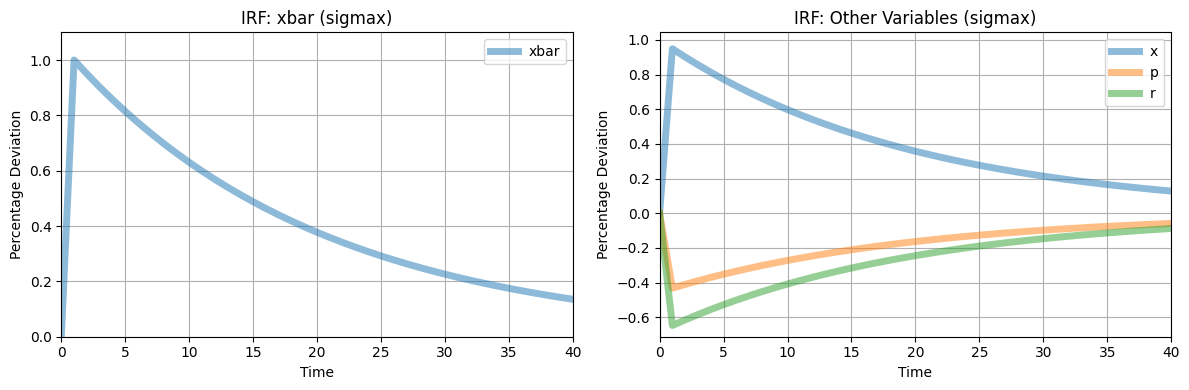

In [62]:
NK.plot_irfs()

In [63]:
NK.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19080\3049471006.py:1: UserWarning: Steady state contains zeros so normalize set to False.
  NK.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))


,sigmax_t,x_t,p_t,r_t,xbar_t
0,-0.002750,0.006695,0.006354,-0.002888,-0.004332
1,0.009680,0.016040,0.015224,-0.006920,-0.010380
2,-0.017649,-0.002411,-0.002289,0.001040,0.001560
3,0.003127,0.000837,0.000794,-0.000361,-0.000541
4,0.006703,0.007498,0.007117,-0.003235,-0.004852
5,-0.001451,0.005672,0.005383,-0.002447,-0.003670
6,-0.004935,0.000453,0.000430,-0.000195,-0.000293
7,-0.003513,-0.003083,-0.002926,0.001330,0.001995
8,0.027651,0.024723,0.023466,-0.010666,-0.016000
9,0.012924,0.036411,0.034560,-0.015709,-0.023564


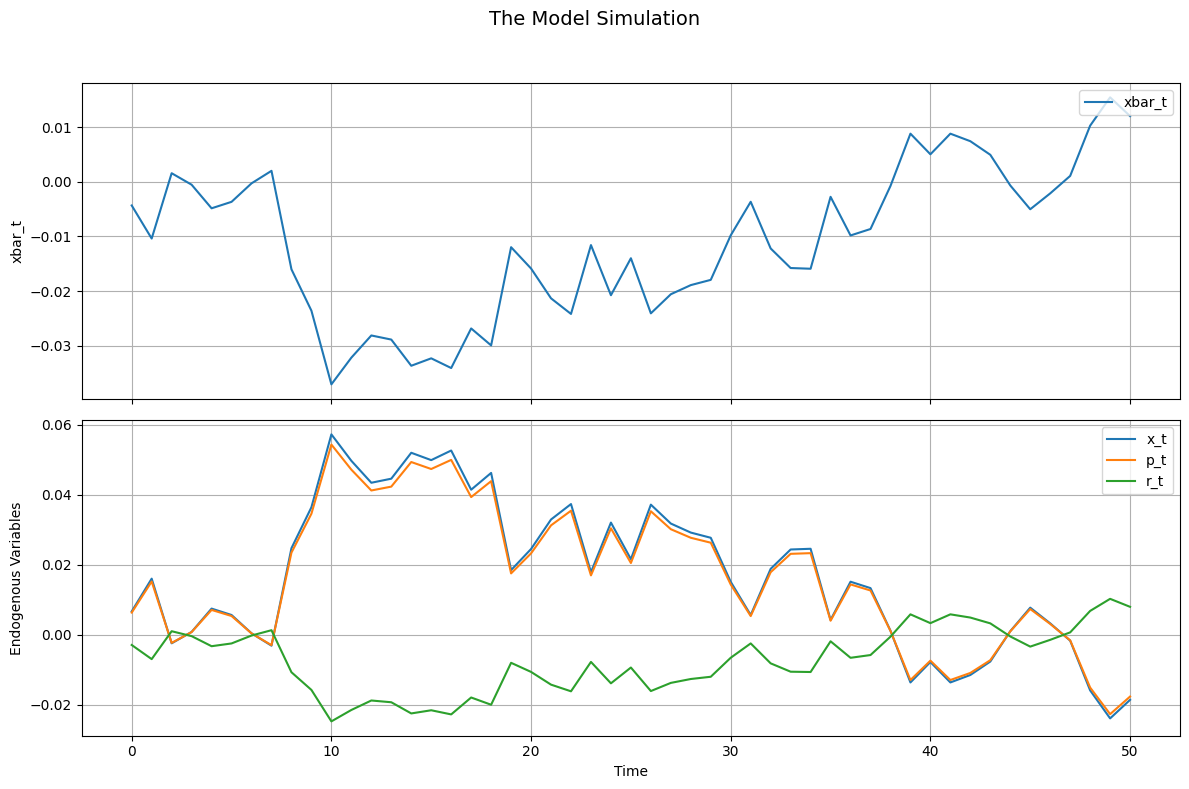

In [64]:
NK.simulations()

# Estimation of the Model


## 📈 Model Estimation Strategy

After solving the structural model, we aim to express it in a **state-space form** to enable estimation. This often requires **augmenting the model with additional stochastic shocks** to match the variability and dynamics observed in real-world data.

---

### 🧩 Why Add More Shocks?

Economic models—especially DSGEs—often understate the volatility seen in macroeconomic time series. By introducing **additional exogenous shocks** (e.g., preference, risk premium, measurement error), we:

* Improve the model’s empirical fit
* Allow for richer dynamic responses
* Enable accurate filtering and smoothing in estimation

---

## ⚙️ Estimation Techniques

We employ two complementary estimation strategies:

### 1. **Classical Maximum Likelihood Estimation (MLE)**

In this method, we treat the model as a **state-space system**:

$$
\begin{aligned}
x_{t+1} &= A x_t + B \varepsilon_t \quad &\text{(transition equation)} \\
y_t &= C x_t + D \eta_t \quad &\text{(measurement equation)}
\end{aligned}
$$

Here, $x_t$ are latent (unobserved) states, $y_t$ are observables, and $\varepsilon_t, \eta_t$ are shock terms. The parameters in matrices $A, B, C, D$ are functions of the model's structural parameters.

**The Kalman Filter** is used to:

* Estimate the unobserved states given observed data
* Compute the **likelihood** of the model
* Maximize this likelihood with respect to the parameters

---

### 🧮 What Is the Kalman Filter? (For Economists)

Think of the Kalman filter as a **recursive forecasting tool**. At every period, it:

1. **Predicts** the value of the unobserved economic variables (like expectations or technology)
2. **Updates** those predictions using observed data (like GDP, inflation)
3. **Minimizes the mean squared error** of the predictions

It is especially powerful for DSGE models because:

* It deals naturally with unobservable variables
* It handles measurement noise
* It works under linear-Gaussian assumptions (which linearized DSGEs satisfy)

---

### 2. **Bayesian Estimation**

Bayesian estimation allows us to **combine prior economic knowledge** with observed data.

Steps:

* Define **priors** for each structural parameter (e.g., Beta for bounded parameters, Normal for preferences, Inverse Gamma for variances)
* Use the **Kalman filter** to compute the likelihood
* Apply **Bayes’ rule** to obtain the posterior distribution:

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

* Use **MCMC algorithms** (e.g., Metropolis-Hastings) to sample from the posterior

---

### ✳️ Summary

| Method   | Needs Prior? | Output          | Strengths                         |
| -------- | ------------ | --------------- | --------------------------------- |
| MLE      | ❌ No         | Point estimates | Fast, interpretable               |
| Bayesian | ✅ Yes        | Distributions   | Incorporates uncertainty & theory |
### In this Example we will use the MLE method to estimate the model parameters. `genetic_algorithm_kalman` 


**1-State Space Formulation**

In [65]:
from econometron.utils import optimizers ,estimation ,state_space

In [66]:
from econometron.utils.state_space import update_ss

In [67]:
from econometron.utils.estimation.MLE import genetic_algorithm_kalman
from econometron.filters import kalman_objective

In [68]:
def derived_fn(p):
    p['kappa'] = ((1 - p['d']) * (1 - p['d'] * p['beta'])) / p['d']
#since we have kappa is written in function of Beta nd delta , the derived_fn here is param fixer , for parameter that are not intialized  
def R_builder(p):
  A1 = np.array([[1, -p['phi'], 0],
                    [0, 1, -p['kappa']],
                    [1/p['g'], 0, 1]])
  if abs(np.linalg.det(A1)) < 1e-6:
    raise ValueError("A1 matrix is singular")
  R1= np.array([[p['sigma_y'], 0, 0],
                [0, p['sigma_p'], 0],
                [0, 0, p['sigma_r']]])

  R=np.linalg.solve(A1,R1)

  return R

def C_builder(p):
    return np.array([[p['sigmax']]])

# Assuming you have this solver:
# def NK.solve(params): ...

# Define updater
base_params = {
    'g': 1.00000000e+01,
    'beta': 8.97384125e-01,
    'kappa': 0.8,
    'rho': 9.61923424e-01,
    'phi': 1,
    'd': 8.64607398e-01 ,
    'sigmax': 7.52359617e-03,
    'sigma_y': 0.01,
    'sigma_p': 0.01,
    'sigma_r': 0.01
}
# [1.00000000e+01 8.97384125e-01 9.61923424e-01 1.00000000e+00
#  8.64607398e-01 7.52359617e-03 7.20758075e-03 1.00000000e-06
#  9.97050476e-03]
update_state_space = update_ss.make_state_space_updater(
    base_params=base_params,
    solver=NK.solve_RE_model,
    build_R=R_builder,
    build_C=C_builder,
    derived_fn=derived_fn
)

In [69]:
parameters = {
    'g': 5,      # Inverse of relative risk aversion (1/g)
    'beta': 0.99,       # Discount factor
    'kappa': 0.8,
    'rho': 0.95,        # Persistence of output gap target
    'phi': 1.5,         # Taylor rule inflation coefficient
    'd': 0.5,          # Calvo parameter
    'sigmax': 0.01,
    'sigma_y': 0.01,
    'sigma_p': 0.01,
    'sigma_r': 0.01
}

# Example usage:
updated = update_state_space(base_params)
print(updated)

{'A': array([[0.96192342]]), 'D': array([[ 0.0250153 ],
       [-0.25015301],
       [-0.25015301]]), 'Q': array([[5.66044993e-05]]), 'R': array([[ 1.98725857e-04,  9.90755809e-05, -1.63753451e-05],
       [ 9.90755809e-05,  9.94253049e-05, -6.41031751e-06],
       [-1.63753451e-05, -6.41031751e-06,  1.01287810e-04]])}


C:\Users\ASUS\econometron\econometron\Models\Linear_RE.py:732: RuntimeWarning: divide by zero encountered in divide
  eigenvals = np.abs(beta / alpha)
C:\Users\ASUS\econometron\econometron\Models\Linear_RE.py:732: RuntimeWarning: invalid value encountered in divide
  eigenvals = np.abs(beta / alpha)


**2-Estimation MLE**

In [70]:
import scipy.io as sio
mat = sio.loadmat('../Z.mat')
y=mat['Z']

`Y` , is the data i t contains Output , Inflation , Nominal Interest Rate

In [71]:
data=y[::-1,:]

In [72]:
param_names = [k for k in parameters.keys() if k != 'kappa']
initial_params = [parameters[name] for name in param_names]

# Fixed parameters (empty since all except kappa are optimized)
fixed_params = {}
LB= [1e-10, 1e-10, 1e-10, 1, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10]
UB= [10, 1, 0.99, 5, 1, 1, 1, 1, 1]

In [73]:
initial_params

[5, 0.99, 0.95, 1.5, 0.5, 0.01, 0.01, 0.01, 0.01]

In [74]:
ga_result = genetic_algorithm_kalman(y, initial_params , LB, UB, param_names, fixed_params, update_state_space,seed=1)

Generation 0: Best fitness = -1323.582909213672, Mean fitness = 64359393.315062426, Near-zero params = 0
{'x': array([5.  , 0.99, 0.95, 1.5 , 0.5 , 0.01, 0.01, 0.01, 0.01]), 'fun': -1323.582909213672, 'nfev': 95, 'message': 'Genetic Algorithm iteration.'}
Error in kalman_objective:
Params: [6.97729763 1.         0.99       1.         0.62543411 0.01304786
 0.01020124 0.0294118  0.01017816]
Exception: Invertibility condition violated: z11 is singular
Error in kalman_objective:
Params: [7.35812705 0.99961631 0.9378011  1.         0.49997628 0.01912732
 0.00943414 0.00787192 0.00853676]
Exception: Invertibility condition violated: z11 is singular
Error in kalman_objective:
Params: [4.52651904 1.         0.969046   1.         0.53033419 0.01356315
 0.01229343 0.01433543 0.00917979]
Exception: Invertibility condition violated: z11 is singular
Error in kalman_objective:
Params: [4.94462868 0.95782841 0.94573102 1.         0.49827695 0.00872707
 0.01050987 0.01447445 0.00997696]
Exception: In

In [75]:
ga_result['result']

{'x': array([9.99789584e+00, 8.98368805e-01, 9.45207359e-01, 1.00000168e+00,
        8.74140344e-01, 9.19034098e-03, 7.77681663e-03, 6.34076193e-05,
        1.12303051e-02]),
 'fun': -1560.8301909500246,
 'nfev': 4550,
 'message': 'Genetic Algorithm completed successfully.'}

In [76]:
ga_result['table']

,Parameter,Estimate,Std Error,P-Value,Log-Likelihood,Method
0,g,9.997896,3.213427e+00,0.001863,1560.830191,Genetic Algorithm
1,beta,0.898369,8.360568e-02,0.000000,1560.830191,Genetic Algorithm
2,rho,0.945207,3.458765e-02,0.000000,1560.830191,Genetic Algorithm
3,phi,1.000002,7.071068e-20,0.000000,1560.830191,Genetic Algorithm
4,d,0.874140,3.010660e-02,0.000000,1560.830191,Genetic Algorithm
5,sigmax,0.009190,3.162576e-03,0.003661,1560.830191,Genetic Algorithm
6,sigma_y,0.007777,6.802445e-04,0.000000,1560.830191,Genetic Algorithm
7,sigma_p,0.000063,2.731698e-04,0.816446,1560.830191,Genetic Algorithm
8,sigma_r,0.011230,6.958438e-04,0.000000,1560.830191,Genetic Algorithm


## the Kalman Smoother 

So after estimating the parameters we can now apply the Kalman Smoother to obtain smoothed estimates of the unobserved states.

In [85]:
import numpy as np

In [86]:
results=np.array([9.99789584e+00, 8.98368805e-01, 9.45207359e-01, 1.00000168e+00,
       8.74140344e-01, 9.19034098e-03, 7.77681663e-03, 6.34076193e-05,
       1.12303051e-02])

In [87]:
for key, value in zip([k for k in parameters.keys() if k != 'kappa'],ga_result['result']['x'] ):
    parameters[key] = value

In [88]:
parameters['kappa'] = ((1 - parameters['d']) * (1 - parameters['d'] * parameters['beta'])) / parameters['d']
print("Updated Parameters:",parameters)

Updated Parameters: {'g': 9.997895837916966, 'beta': 0.8983688051498522, 'kappa': 0.03091267426377879, 'rho': 0.9452073593844871, 'phi': 1.0000016835097116, 'd': 0.8741403440663353, 'sigmax': 0.009190340979245268, 'sigma_y': 0.007776816631698006, 'sigma_p': 6.340761927651196e-05, 'sigma_r': 0.011230305060414579}


In [89]:
#the updted state space with the optimized parameters
updated_ess = update_state_space(parameters)
print(updated_ess )

{'A': array([[0.94520736]]), 'D': array([[ 0.02008489],
       [-0.20080049],
       [-0.20080083]]), 'Q': array([[8.44623673e-05]]), 'R': array([[ 6.02303858e-05, -6.20713540e-08, -2.13761817e-06],
       [-6.20713540e-08,  1.24347772e-07,  3.89288993e-06],
       [-2.13761817e-06,  3.89288993e-06,  1.25944808e-04]])}


In [90]:
from econometron.filters import kalman_smooth

In [91]:
smoothed_states = kalman_smooth(y, updated_ess)

Running Kalman smoother...
{'A': array([[0.94520736]]), 'D': array([[ 0.02008489],
       [-0.20080049],
       [-0.20080083]]), 'Q': array([[8.44623673e-05]]), 'R': array([[ 6.02303858e-05, -6.20713540e-08, -2.13761817e-06],
       [-6.20713540e-08,  1.24347772e-07,  3.89288993e-06],
       [-2.13761817e-06,  3.89288993e-06,  1.25944808e-04]])}


In [93]:
smoothed_states

array([[ 6.03545068e-01, -7.54376240e-02, -6.51100108e-02,
        -3.82405498e-02, -3.03311074e-02, -1.87528591e-02,
        -2.68289256e-03,  7.53175643e-03,  1.29231595e-02,
         2.40901404e-02,  1.62758676e-02, -5.87056763e-04,
         2.52174772e-03,  3.27710312e-03,  3.83510635e-03,
         1.09235138e-02,  1.03032696e-02,  1.33045373e-02,
         1.13377013e-02,  1.61327157e-02,  3.27255540e-02,
         3.24991281e-02,  3.64958162e-02,  2.65900928e-02,
         4.84002371e-03, -1.92547670e-03, -3.44251640e-03,
         8.60900542e-04,  1.32071902e-03, -6.53259637e-04,
        -2.61138481e-03, -7.68844266e-03, -1.42162629e-02,
        -7.95773969e-03, -7.64019152e-03, -1.48350106e-02,
        -7.90620505e-03, -2.18575836e-02, -3.32970360e-02,
        -2.25193250e-02, -1.61814788e-02, -5.18667568e-03,
         5.69655498e-03,  7.45020209e-03,  5.28057831e-03,
         5.55682843e-03,  5.81919788e-03,  3.44325454e-03,
         4.28744511e-03,  7.45764898e-03,  8.03892679e-0

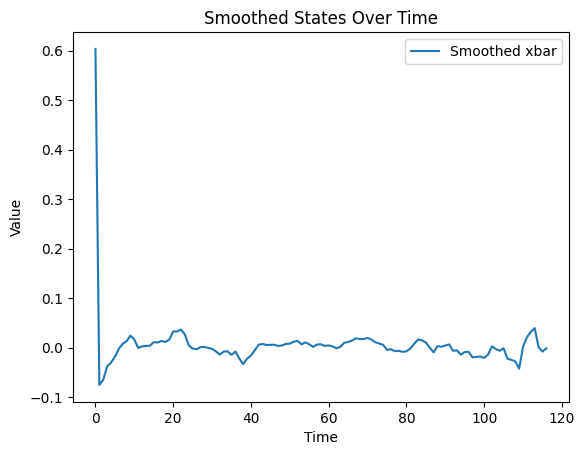

In [98]:
import matplotlib.pyplot as plt

plt.plot(smoothed_states.T, label='Smoothed xbar')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Smoothed States Over Time')
plt.legend()
plt.show()
